In [1]:
import pandas as pd
filepath = '../data/지하철/전처리_지하철/전처리_지하철_요일_고유역번호_승하차차이0717.csv'
df = pd.read_csv(filepath, encoding='utf-8', index_col=0)
df.head()

,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,요일,휴무일
0,2022-05-01,1호선,150,서울역,승차,184,193,328,677,1120,...,2619,2648,2409,2494,1902,669,0,33880,6,1
1,2022-05-01,1호선,150,서울역,하차,139,655,842,1066,1547,...,2626,2196,1844,1344,752,376,0,31237,6,1
2,2022-05-01,1호선,150,서울역,승하차 차이,45,-462,-514,-389,-427,...,-7,452,565,1150,1150,293,0,2643,6,1
3,2022-05-01,1호선,151,시청,승차,61,67,124,162,211,...,1257,890,861,634,387,129,0,11449,6,1
4,2022-05-01,1호선,151,시청,하차,77,250,336,652,1064,...,351,251,211,167,88,114,0,13167,6,1


In [2]:
ndf = df.copy()

In [3]:
up_down = ndf.groupby(['호선', '역명', '고유역번호(외부역코드)', '요일', '승하차구분'], as_index=False).sum()
up_down

C:\Users\mase8\AppData\Local\Temp\ipykernel_3596\3620724839.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  up_down = ndf.groupby(['호선', '역명', '고유역번호(외부역코드)', '요일', '승하차구분'], as_index=False).sum()


,호선,역명,고유역번호(외부역코드),요일,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,휴무일
0,1호선,동대문,155,0,승차,23425,17931,28342,37008,31793,...,41730,40053,27946,22843,21731,17906,7574,1078,573479,0
1,1호선,동대문,155,0,승하차 차이,18932,5068,5390,-5364,-7411,...,10585,5814,-7928,-929,2009,608,-7990,-2658,23790,0
2,1호선,동대문,155,0,하차,4493,12863,22952,42372,39204,...,31145,34239,35874,23772,19722,17298,15564,3736,549689,0
3,1호선,동대문,155,1,승차,24638,18118,29683,39175,33479,...,42563,41596,28452,23719,23378,19100,8010,1149,585626,0
4,1호선,동대문,155,1,승하차 차이,20191,5490,5813,-5692,-7623,...,10409,6156,-7523,270,3476,585,-8231,-3174,30759,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,8호선,천호(풍납토성),2812,5,승하차 차이,12367,427,9618,15037,3675,...,-19487,-17130,-17689,-9621,-15930,-14803,-14007,-3681,-114921,52
5792,8호선,천호(풍납토성),2812,5,하차,2576,17630,13061,20911,35629,...,68209,60023,47846,38829,38835,33082,22833,3797,761808,52
5793,8호선,천호(풍납토성),2812,6,승차,7210,10057,13746,23474,29662,...,35428,36014,26529,24957,18410,13222,5556,96,482976,53
5794,8호선,천호(풍납토성),2812,6,승하차 차이,5900,604,4087,10278,3869,...,-11848,-7699,-9240,-6160,-12071,-9608,-8993,-1744,-66107,53


In [4]:
up_down = up_down.drop('휴무일', axis=1)

In [5]:
data = pd.read_csv('./\data\서울교통공사_1_8호선 역사 좌표(위경도) 정보_20211231.csv', encoding='ANSI')
data.head()

,연번,호선,고유역번호(외부역코드),역명,위도,경도,작성일자
0,1,1,150,서울,37.553150,126.972533,1974-02-28
1,2,1,151,시청,37.563590,126.975407,1974-08-15
2,3,1,152,종각,37.570203,126.983116,1974-08-15
3,4,1,153,종로3가,37.570429,126.992095,1974-08-15
4,5,1,154,종로5가,37.570971,127.001900,1974-03-31


In [6]:
data['위도'] = data['위도'].astype('float')
data['경도'] = data['경도'].astype('float')
subway = data.loc[:, '호선':'경도']
subway.loc[276] = [7, 2758, '상동', 37.5058, 126.7532]
subway.loc[277] = [7, 2753, '부평구청', 37.5087, 126.7206]
subway.loc[278] = [7, 2752, '까치울', 37.5062, 126.8110]
subway.loc[279] = [7, 2754, '부천시청', 37.5046, 126.7636]

In [7]:
subway['location'] = list(zip(subway['위도'], subway['경도']))
subway = subway.sort_values(by='고유역번호(외부역코드)')
subway

,호선,고유역번호(외부역코드),역명,위도,경도,location
0,1,150,서울,37.553150,126.972533,"(37.55315, 126.972533)"
1,1,151,시청,37.563590,126.975407,"(37.56359, 126.975407)"
2,1,152,종각,37.570203,126.983116,"(37.570203, 126.983116)"
3,1,153,종로3가,37.570429,126.992095,"(37.570429, 126.992095)"
4,1,154,종로5가,37.570971,127.001900,"(37.570971, 127.0019)"
...,...,...,...,...,...,...
272,8,2824,단대오거리,37.445057,127.156735,"(37.445057, 127.156735)"
273,8,2825,신흥,37.440952,127.147590,"(37.440952, 127.14759)"
274,8,2826,수진,37.437575,127.140936,"(37.437575, 127.140936)"
275,8,2827,모란,37.433888,127.129921,"(37.433888, 127.129921)"


In [8]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 269
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   호선            280 non-null    int64  
 1   고유역번호(외부역코드)  280 non-null    int64  
 2   역명            280 non-null    object 
 3   위도            280 non-null    float64
 4   경도            280 non-null    float64
 5   location      280 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 15.3+ KB


In [9]:
result = up_down.merge(subway, on='고유역번호(외부역코드)', how='outer')
result.head()

,호선_x,역명_x,고유역번호(외부역코드),요일,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,호선_y,역명_y,위도,경도,location
0,1호선,동대문,155,0.0,승차,23425.0,17931.0,28342.0,37008.0,31793.0,...,21731.0,17906.0,7574.0,1078.0,573479.0,1.0,동대문,37.57179,127.011383,"(37.57179, 127.011383)"
1,1호선,동대문,155,0.0,승하차 차이,18932.0,5068.0,5390.0,-5364.0,-7411.0,...,2009.0,608.0,-7990.0,-2658.0,23790.0,1.0,동대문,37.57179,127.011383,"(37.57179, 127.011383)"
2,1호선,동대문,155,0.0,하차,4493.0,12863.0,22952.0,42372.0,39204.0,...,19722.0,17298.0,15564.0,3736.0,549689.0,1.0,동대문,37.57179,127.011383,"(37.57179, 127.011383)"
3,1호선,동대문,155,1.0,승차,24638.0,18118.0,29683.0,39175.0,33479.0,...,23378.0,19100.0,8010.0,1149.0,585626.0,1.0,동대문,37.57179,127.011383,"(37.57179, 127.011383)"
4,1호선,동대문,155,1.0,승하차 차이,20191.0,5490.0,5813.0,-5692.0,-7623.0,...,3476.0,585.0,-8231.0,-3174.0,30759.0,1.0,동대문,37.57179,127.011383,"(37.57179, 127.011383)"


In [10]:
result = result.drop(['호선_y', '역명_y'], axis=1)

In [11]:
result.rename({'호선_x':'호선', '역명_x':'역명'}, axis=1, inplace=True)

In [12]:
result.head()

,호선,역명,고유역번호(외부역코드),요일,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,위도,경도,location
0,1호선,동대문,155,0.0,승차,23425.0,17931.0,28342.0,37008.0,31793.0,...,27946.0,22843.0,21731.0,17906.0,7574.0,1078.0,573479.0,37.57179,127.011383,"(37.57179, 127.011383)"
1,1호선,동대문,155,0.0,승하차 차이,18932.0,5068.0,5390.0,-5364.0,-7411.0,...,-7928.0,-929.0,2009.0,608.0,-7990.0,-2658.0,23790.0,37.57179,127.011383,"(37.57179, 127.011383)"
2,1호선,동대문,155,0.0,하차,4493.0,12863.0,22952.0,42372.0,39204.0,...,35874.0,23772.0,19722.0,17298.0,15564.0,3736.0,549689.0,37.57179,127.011383,"(37.57179, 127.011383)"
3,1호선,동대문,155,1.0,승차,24638.0,18118.0,29683.0,39175.0,33479.0,...,28452.0,23719.0,23378.0,19100.0,8010.0,1149.0,585626.0,37.57179,127.011383,"(37.57179, 127.011383)"
4,1호선,동대문,155,1.0,승하차 차이,20191.0,5490.0,5813.0,-5692.0,-7623.0,...,-7523.0,270.0,3476.0,585.0,-8231.0,-3174.0,30759.0,37.57179,127.011383,"(37.57179, 127.011383)"


In [13]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 0 to 5818
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   호선            5817 non-null   object 
 1   역명            5817 non-null   object 
 2   고유역번호(외부역코드)  5819 non-null   int64  
 3   요일            5817 non-null   float64
 4   승하차구분         5817 non-null   object 
 5   06시이전         5817 non-null   float64
 6   06-07시간대      5817 non-null   float64
 7   07-08시간대      5817 non-null   float64
 8   08-09시간대      5817 non-null   float64
 9   09-10시간대      5817 non-null   float64
 10  10-11시간대      5817 non-null   float64
 11  11-12시간대      5817 non-null   float64
 12  12-13시간대      5817 non-null   float64
 13  13-14시간대      5817 non-null   float64
 14  14-15시간대      5817 non-null   float64
 15  15-16시간대      5817 non-null   float64
 16  16-17시간대      5817 non-null   float64
 17  17-18시간대      5817 non-null   float64
 18  18-19시간대      5817 non-null 

In [14]:
result[result.location.isnull()]

,호선,역명,고유역번호(외부역코드),요일,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,위도,경도,location
4938,7호선,부천시청,2757,1.0,승차,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4939,7호선,부천시청,2757,1.0,승하차 차이,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4940,7호선,부천시청,2757,1.0,하차,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4941,7호선,부평구청,2761,0.0,승차,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4942,7호선,부평구청,2761,0.0,승하차 차이,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4943,7호선,부평구청,2761,0.0,하차,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4944,7호선,부평구청,2761,1.0,승차,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4945,7호선,부평구청,2761,1.0,승하차 차이,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4946,7호선,부평구청,2761,1.0,하차,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4947,7호선,부평구청,2761,5.0,승차,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [15]:
result.dropna(inplace=True)

In [16]:
result.isnull().sum()

호선              0
역명              0
고유역번호(외부역코드)    0
요일              0
승하차구분           0
06시이전           0
06-07시간대        0
07-08시간대        0
08-09시간대        0
09-10시간대        0
10-11시간대        0
11-12시간대        0
12-13시간대        0
13-14시간대        0
14-15시간대        0
15-16시간대        0
16-17시간대        0
17-18시간대        0
18-19시간대        0
19-20시간대        0
20-21시간대        0
21-22시간대        0
22-23시간대        0
23-24시간대        0
24시이후           0
총 이용인원          0
위도              0
경도              0
location        0
dtype: int64

In [17]:
result.to_csv('../data/지하철/전처리_지하철/전처리_지하철_요일_고유역번호_승하차차이_위도경도0717.csv')

In [18]:
result_diff = result[result['승하차구분'] == '승하차 차이']

In [19]:
result_diff.head()

,호선,역명,고유역번호(외부역코드),요일,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,위도,경도,location
1,1호선,동대문,155,0.0,승하차 차이,18932.0,5068.0,5390.0,-5364.0,-7411.0,...,-7928.0,-929.0,2009.0,608.0,-7990.0,-2658.0,23790.0,37.57179,127.011383,"(37.57179, 127.011383)"
4,1호선,동대문,155,1.0,승하차 차이,20191.0,5490.0,5813.0,-5692.0,-7623.0,...,-7523.0,270.0,3476.0,585.0,-8231.0,-3174.0,30759.0,37.57179,127.011383,"(37.57179, 127.011383)"
7,1호선,동대문,155,2.0,승하차 차이,20672.0,4809.0,5687.0,-4420.0,-8459.0,...,-7102.0,1940.0,3194.0,28.0,-8434.0,-3215.0,27765.0,37.57179,127.011383,"(37.57179, 127.011383)"
10,1호선,동대문,155,3.0,승하차 차이,20701.0,5166.0,5659.0,-4902.0,-7579.0,...,-6386.0,400.0,4269.0,761.0,-8082.0,-3590.0,30824.0,37.57179,127.011383,"(37.57179, 127.011383)"
13,1호선,동대문,155,4.0,승하차 차이,19092.0,4909.0,5056.0,-4443.0,-6845.0,...,2416.0,8111.0,5745.0,4170.0,-1289.0,-3348.0,61851.0,37.57179,127.011383,"(37.57179, 127.011383)"


In [20]:
result_diff.columns

Index(['호선', '역명', '고유역번호(외부역코드)', '요일', '승하차구분', '06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후',
       '총 이용인원', '위도', '경도', 'location'],
      dtype='object')

In [21]:
group_diff = result_diff.groupby(['호선','역명','고유역번호(외부역코드)'], as_index=False)['06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후','총 이용인원'].sum()
group_diff

C:\Users\mase8\AppData\Local\Temp\ipykernel_796\2054109629.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_diff = result_diff.groupby(['호선','역명','고유역번호(외부역코드)'], as_index=False)['06시이전', '06-07시간대',


,호선,역명,고유역번호(외부역코드),06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원
0,1호선,동대문,155,113261.0,26768.0,26547.0,-28786.0,-47572.0,-66362.0,-86091.0,...,78802.0,73501.0,42765.0,-25291.0,12341.0,20580.0,2997.0,-46609.0,-20630.0,151297.0
1,1호선,동묘앞,159,23388.0,-14617.0,-29326.0,-114699.0,-98605.0,-124470.0,-148233.0,...,184196.0,198052.0,118851.0,25669.0,4909.0,-3736.0,-27953.0,-31192.0,-20168.0,-130353.0
2,1호선,서울역,150,7663.0,-427924.0,-763452.0,-1717988.0,-1065395.0,-225156.0,49613.0,...,361424.0,818915.0,1360735.0,531961.0,391231.0,497329.0,315992.0,107583.0,-9669.0,539506.0
3,1호선,시청,151,-26127.0,-235838.0,-705013.0,-2147146.0,-916306.0,-334523.0,-247265.0,...,341844.0,716866.0,1573974.0,559213.0,512082.0,477399.0,305071.0,79295.0,-3552.0,-93761.0
4,1호선,신설동,156,79422.0,58.0,-39446.0,-322325.0,-158521.0,-57362.0,1906.0,...,111146.0,182812.0,271606.0,872.0,8457.0,-4719.0,-29119.0,-58711.0,-17903.0,148729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,8호선,신흥,2825,37171.0,43344.0,128477.0,141160.0,68305.0,24845.0,17682.0,...,-18848.0,-37570.0,-114641.0,-119202.0,-57990.0,-57901.0,-56857.0,-40524.0,-11871.0,-100447.0
273,8호선,암사,2811,164193.0,280390.0,855554.0,1025821.0,451618.0,205363.0,131109.0,...,-128411.0,-252050.0,-562538.0,-539967.0,-272307.0,-230710.0,-283184.0,-169217.0,-49779.0,740022.0
274,8호선,잠실(송파구청),2815,-11876.0,-70454.0,-270394.0,-784816.0,-430249.0,-270970.0,-254722.0,...,52270.0,124351.0,281959.0,206157.0,294036.0,335932.0,247715.0,61811.0,1136.0,-934935.0
275,8호선,장지,2820,35356.0,68645.0,222131.0,117571.0,22913.0,22119.0,-11175.0,...,38764.0,133621.0,-37306.0,-121650.0,18439.0,4690.0,-81800.0,-67389.0,-18916.0,319917.0


In [22]:
diff_top = group_diff.nlargest(10, '총 이용인원')
diff_top

,호선,역명,고유역번호(외부역코드),06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원
30,2호선,선릉,220,-14802.0,-356301.0,-1089202.0,-2972679.0,-2289829.0,-830490.0,-211090.0,...,851748.0,1621250.0,2780139.0,1282925.0,831545.0,838157.0,695197.0,202484.0,-467.0,2051466.0
64,3호선,교대(법원.검찰청),330,9224.0,-36861.0,-127162.0,-416353.0,-303110.0,-63276.0,31912.0,...,208605.0,351764.0,541677.0,219350.0,235589.0,262558.0,227735.0,66297.0,3671.0,1728301.0
218,7호선,고속터미널,2736,-18858.0,-219475.0,-295348.0,-386313.0,-155091.0,-57854.0,12635.0,...,248174.0,391371.0,327871.0,218349.0,320287.0,278698.0,235928.0,62155.0,1273.0,1281067.0
104,4호선,사당,433,106071.0,89578.0,532062.0,582196.0,472356.0,235739.0,72676.0,...,-66951.0,-223391.0,-523942.0,-318364.0,-34187.0,36708.0,12489.0,-77264.0,-50986.0,1202679.0
221,7호선,군자(능동),2727,92490.0,96724.0,318366.0,345177.0,246377.0,115671.0,80575.0,...,12940.0,-2646.0,-88411.0,-152603.0,-38491.0,-25799.0,-38794.0,-42971.0,-25620.0,1114171.0
213,6호선,화랑대(서울여대입구),2647,63422.0,220085.0,635533.0,476456.0,186410.0,116400.0,87419.0,...,42407.0,-43294.0,-242251.0,-290820.0,-158434.0,-148277.0,-144084.0,-114851.0,-38944.0,897750.0
45,2호선,왕십리(성동구청),208,82168.0,38532.0,149231.0,218833.0,126896.0,54653.0,43541.0,...,64210.0,-8581.0,-229267.0,-131129.0,25777.0,91305.0,107154.0,25989.0,-24016.0,832504.0
152,5호선,신정(은행정),2520,137489.0,233013.0,674429.0,769261.0,332267.0,160459.0,120362.0,...,-86341.0,-152989.0,-384054.0,-334545.0,-201490.0,-204757.0,-202384.0,-139277.0,-39204.0,819139.0
7,1호선,종로3가,153,10359.0,-113221.0,-241039.0,-730798.0,-637506.0,-463471.0,-423802.0,...,386793.0,531766.0,693099.0,462414.0,446111.0,508046.0,402321.0,152980.0,-539.0,802822.0
112,4호선,쌍문,413,269322.0,515904.0,1302999.0,1159427.0,655540.0,391931.0,288326.0,...,-192609.0,-371861.0,-828620.0,-906938.0,-520696.0,-480236.0,-480702.0,-340299.0,-78065.0,754586.0


In [23]:
diff_bottom = group_diff.nsmallest(10, '총 이용인원')
diff_bottom

,호선,역명,고유역번호(외부역코드),06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원
107,4호선,서울역,426,44342.0,-115920.0,-312597.0,-784832.0,-456545.0,-193459.0,-148791.0,...,-147057.0,66006.0,244139.0,-85070.0,-78614.0,-73024.0,-73546.0,-51027.0,-25668.0,-2913900.0
43,2호선,역삼,221,-39367.0,-352249.0,-1524209.0,-3954982.0,-3373007.0,-1252600.0,-424269.0,...,643451.0,1869226.0,2623918.0,1368632.0,797353.0,786016.0,523689.0,153949.0,7167.0,-2095142.0
59,2호선,홍대입구,239,297136.0,156930.0,289541.0,-281373.0,-845748.0,-566203.0,-683011.0,...,-219938.0,-240746.0,-453199.0,-112804.0,682640.0,1233137.0,1383756.0,524139.0,-62024.0,-1650567.0
13,2호선,교대(법원.검찰청),223,-48546.0,-163499.0,-365092.0,-1394536.0,-1308960.0,-474923.0,-294767.0,...,142715.0,407413.0,732941.0,264140.0,345974.0,408959.0,301189.0,66184.0,-119.0,-1529862.0
25,2호선,사당,226,97789.0,-84569.0,312651.0,364922.0,293778.0,53850.0,-107473.0,...,-222071.0,-497781.0,-848499.0,-603644.0,-76141.0,47752.0,33377.0,-67240.0,-66635.0,-1371989.0
31,2호선,성수,211,16696.0,-246591.0,-620961.0,-2784076.0,-1518967.0,-520955.0,-332639.0,...,143944.0,754027.0,2006954.0,820340.0,649512.0,646011.0,443295.0,104038.0,-37991.0,-1257298.0
82,3호선,양재(서초구청),332,29767.0,-348620.0,-864631.0,-2218225.0,-1027017.0,-322649.0,-161010.0,...,307686.0,715234.0,1383356.0,411862.0,367220.0,353726.0,177705.0,-8675.0,-22586.0,-1107865.0
58,2호선,합정,238,82878.0,47410.0,118490.0,-471275.0,-583299.0,-284816.0,-249504.0,...,-107496.0,-100344.0,-13837.0,-27818.0,245840.0,416329.0,432757.0,153350.0,-19894.0,-1045155.0
17,2호선,당산,237,41922.0,48537.0,187838.0,-239353.0,-10046.0,64033.0,63640.0,...,-60830.0,-64994.0,-180857.0,-282474.0,-134509.0,-133990.0,-136030.0,-139536.0,-42203.0,-1003076.0
12,2호선,건대입구,212,179030.0,59700.0,321604.0,357499.0,121971.0,-59412.0,-131007.0,...,-184529.0,-394405.0,-841763.0,-511463.0,31408.0,198633.0,301876.0,173706.0,-43170.0,-958768.0


In [24]:
import warnings

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

# 다시 출력하게 하기
#warnings.filterwarnings(action='default')

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# 폰트 깨짐 문제
import matplotlib
matplotlib.rc('font', family='Malgun Gothic') # for Windows
plt.rc('font', family='Malgun Gothic') # for Windows

In [41]:
# 마이너스, 깨짐 문제
matplotlib.rc('axes', unicode_minus=False)

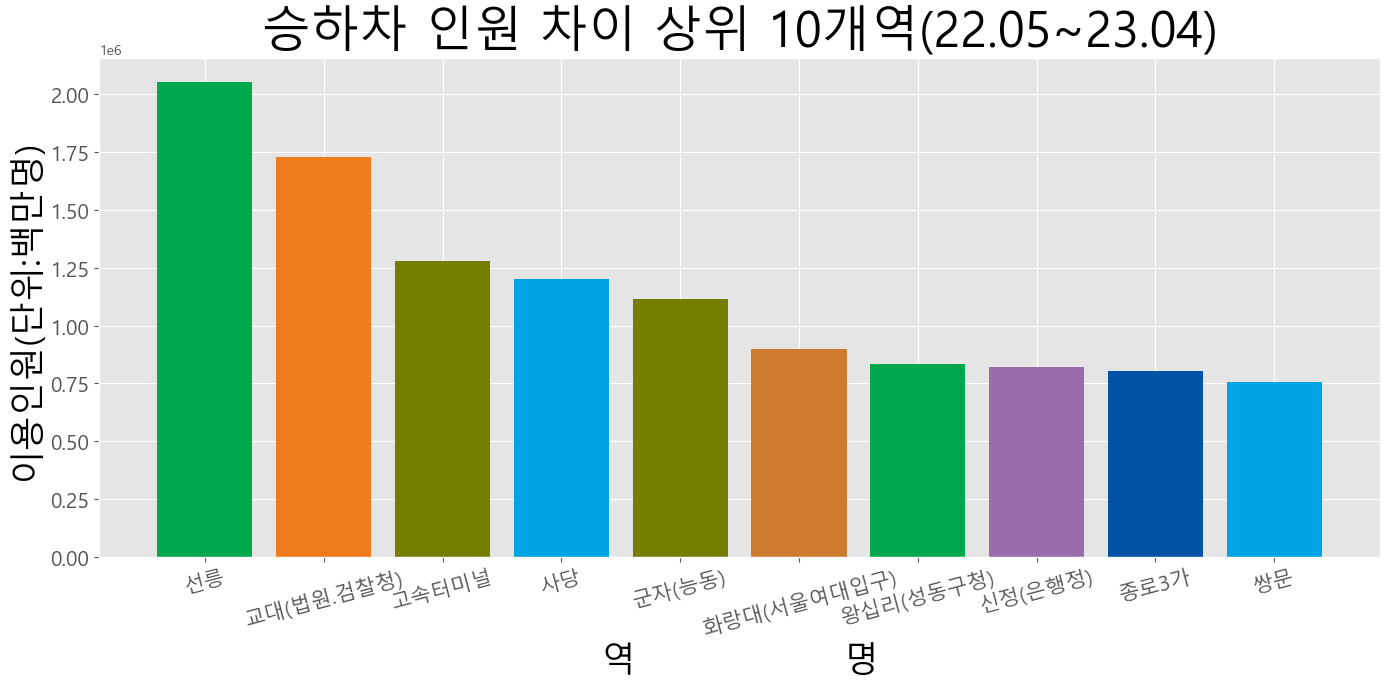

In [39]:
plt.style.use('ggplot') 
plt.figure(figsize=(14, 7))

# colors = plt.cm.cividis(np.linspace(0, 1, len(down_10)))

# for i in range(len(down_10)):
#     plt.bar(down_10['역명'].iloc[i], down_10['총 이용인원'].iloc[i], color=colors[i])

line_colors = {
    '1호선': '#0052A4',
    '2호선': '#00A84D',
    '3호선': '#EF7C1C',
    '4호선': '#00A4E3',
    '5호선': '#996CAC',
    '6호선': '#CD7C2F',
    '7호선': '#747F00',
    '8호선': '#E6186C'
}

# 16진수 색상 코드를 RGB로 변환하는 함수
def hex_to_rgb(hex_code):
    hex_code = hex_code.lstrip('#')
    return tuple(int(hex_code[i:i+2], 16)/255 for i in (0, 2, 4))

for i in range(len(diff_top)):
    line_name = diff_top['호선'].iloc[i]   # 호선 이름 추출
    plt.bar(diff_top['역명'].iloc[i], diff_top['총 이용인원'].iloc[i], color=hex_to_rgb(line_colors[line_name]))

plt.xticks(rotation=15, fontsize=15)
plt.yticks(fontsize=15)
plt.title('승하차 인원 차이 상위 10개역(22.05~23.04)', size=35)
plt.xlabel('역                 명', size=25)
plt.ylabel('이용인원(단위:백만명)', size=25)

plt.tight_layout()

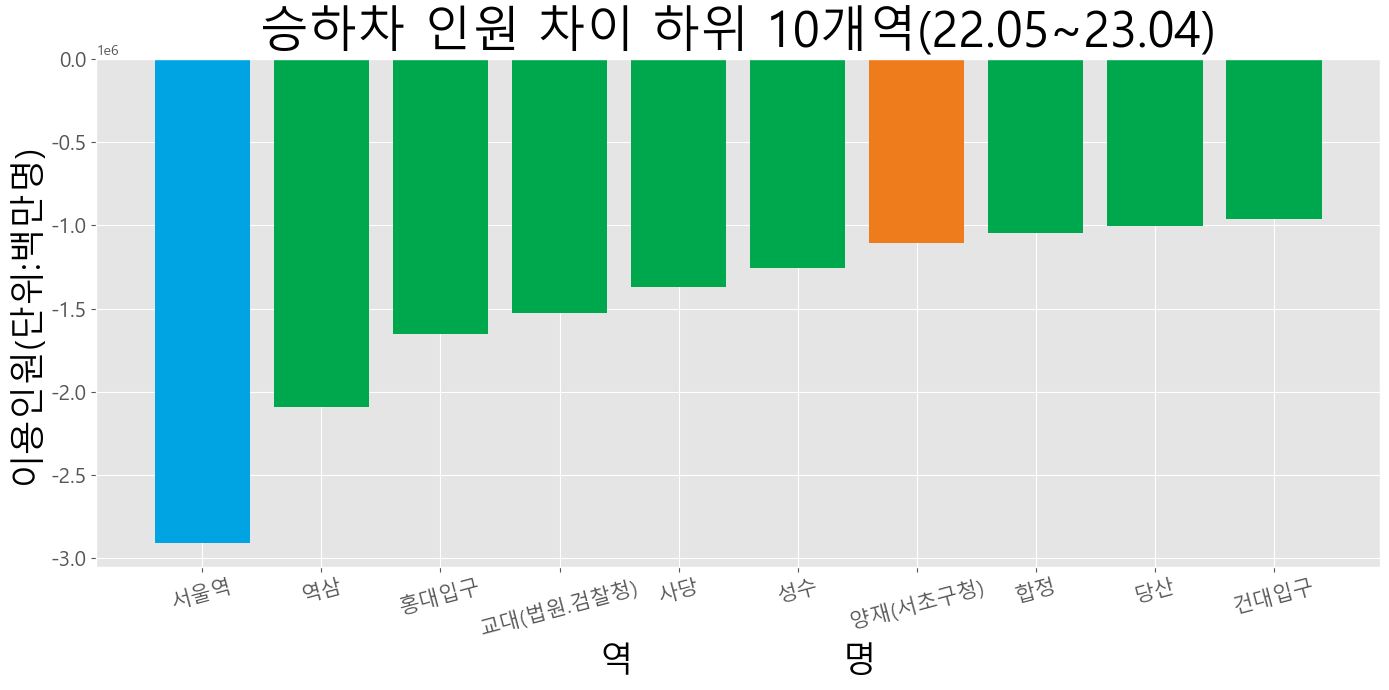

In [43]:
plt.style.use('ggplot') 
plt.figure(figsize=(14, 7))

# colors = plt.cm.cividis(np.linspace(0, 1, len(down_10)))

# for i in range(len(down_10)):
#     plt.bar(down_10['역명'].iloc[i], down_10['총 이용인원'].iloc[i], color=colors[i])

line_colors = {
    '1호선': '#0052A4',
    '2호선': '#00A84D',
    '3호선': '#EF7C1C',
    '4호선': '#00A4E3',
    '5호선': '#996CAC',
    '6호선': '#CD7C2F',
    '7호선': '#747F00',
    '8호선': '#E6186C'
}

# 16진수 색상 코드를 RGB로 변환하는 함수
def hex_to_rgb(hex_code):
    hex_code = hex_code.lstrip('#')
    return tuple(int(hex_code[i:i+2], 16)/255 for i in (0, 2, 4))

for i in range(len(diff_bottom)):
    line_name = diff_bottom['호선'].iloc[i]   # 호선 이름 추출
    plt.bar(diff_bottom['역명'].iloc[i], diff_bottom['총 이용인원'].iloc[i], color=hex_to_rgb(line_colors[line_name]))

plt.xticks(rotation=15, fontsize=15)
plt.yticks(fontsize=15)
plt.title('승하차 인원 차이 하위 10개역(22.05~23.04)', size=35)
plt.xlabel('역                 명', size=25)
plt.ylabel('이용인원(단위:백만명)', size=25)

plt.tight_layout()

In [27]:
line = {}
for i in range(1, 9):
    line[i] = result_diff[result_diff['호선'] == f'{i}호선']
line[2].head()

,호선,역명,고유역번호(외부역코드),요일,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,위도,경도,location
211,2호선,강남,222,0.0,승하차 차이,-8953.0,-73285.0,-241732.0,-513039.0,-529019.0,...,242015.0,213679.0,263949.0,224973.0,75216.0,9765.0,136658.0,37.497958,127.027539,"(37.497958, 127.027539)"
214,2호선,강남,222,1.0,승하차 차이,-10563.0,-76794.0,-263247.0,-555175.0,-579698.0,...,238873.0,232969.0,294373.0,259346.0,98436.0,13619.0,138659.0,37.497958,127.027539,"(37.497958, 127.027539)"
217,2호선,강남,222,2.0,승하차 차이,-8621.0,-74902.0,-252340.0,-535939.0,-558373.0,...,218627.0,219947.0,295749.0,275958.0,108550.0,15399.0,138764.0,37.497958,127.027539,"(37.497958, 127.027539)"
220,2호선,강남,222,3.0,승하차 차이,-8453.0,-74165.0,-257530.0,-548304.0,-558216.0,...,210812.0,224856.0,299440.0,282505.0,120803.0,19495.0,132182.0,37.497958,127.027539,"(37.497958, 127.027539)"
223,2호선,강남,222,4.0,승하차 차이,-7751.0,-72713.0,-240293.0,-527615.0,-533969.0,...,138902.0,185397.0,252314.0,287674.0,165414.0,27583.0,43054.0,37.497958,127.027539,"(37.497958, 127.027539)"


In [28]:
import folium
# 호선별 월요일 출근시간 승하차 차이
for i in range(1, 9):
    max_pop = max(max(line[i]['08-09시간대']) for idx, row in line[i].iterrows())
    seoul_map = folium.Map(location=[37.55,126.98], zoom_start=13) 
    line_name = f'{i}호선'
    for index, row in line[i][line[i]['요일']==0].iterrows():        
        color = 'blue' if row['08-09시간대'] >=0 else 'red'
        popup = folium.Popup(row['역명'], max_width=200)
        radius = abs(row['08-09시간대']/max_pop) * 30
        folium.CircleMarker(location=row['location'], popup=popup,\
                            color=color, fill_color=color,\
                            radius=radius).add_to(seoul_map)
    seoul_map.save(f'./map_visual/seoul_diff_{i}_mon_08.html')

In [29]:
# 호선별 토요일 출근시간 승하차 차이
for i in range(1, 9):
    max_pop = max(max(line[i]['08-09시간대']) for idx, row in line[i].iterrows())
    seoul_map = folium.Map(location=[37.55,126.98], zoom_start=13) 
    line_name = f'{i}호선'
    for index, row in line[i][line[i]['요일']==5].iterrows():        
        color = 'blue' if row['08-09시간대'] >=0 else 'red'
        popup = folium.Popup(row['역명'], max_width=200)
        radius = abs(row['08-09시간대']/max_pop) * 30
        folium.CircleMarker(location=row['location'], popup=popup,\
                            color=color, fill_color=color,\
                            radius=radius).add_to(seoul_map)
    seoul_map.save(f'./map_visual/seoul_diff_{i}_sat_08.html')

In [30]:
# 호선별 월요일 퇴근시간 승하차 차이
for i in range(1, 9):
    max_pop = max(max(line[i]['18-19시간대']) for idx, row in line[i].iterrows())
    seoul_map = folium.Map(location=[37.55,126.98], zoom_start=13) 
    line_name = f'{i}호선'
    for index, row in line[i][line[i]['요일']==0].iterrows():        
        color = 'blue' if row['18-19시간대'] >=0 else 'red'
        popup = folium.Popup(row['역명'], max_width=200)
        radius = abs(row['18-19시간대']/max_pop) * 30
        folium.CircleMarker(location=row['location'], popup=popup,\
                            color=color, fill_color=color,\
                            radius=radius).add_to(seoul_map)
    seoul_map.save(f'./map_visual/seoul_diff_{i}_mon_18.html')

In [31]:
# 호선별 토요일 퇴근시간 승하차 차이
for i in range(1, 9):
    max_pop = max(max(line[i]['18-19시간대']) for idx, row in result_diff.iterrows())

for i in range(1, 9):
    seoul_map = folium.Map(location=[37.55,126.98], zoom_start=13) 
    line_name = f'{i}호선'
    for index, row in line[i][line[i]['요일']==5].iterrows():        
        color = 'blue' if row['18-19시간대'] >=0 else 'red'
        popup = folium.Popup(row['역명'], max_width=200)
        radius = abs(row['18-19시간대']/max_pop) * 30
        folium.CircleMarker(location=row['location'], popup=popup,\
                            color=color, fill_color=color,\
                            radius=radius).add_to(seoul_map)
    seoul_map.save(f'./map_visual/seoul_diff_{i}_sat_18.html')

In [32]:
# 전체노선 월요일 출근시간 승하차 차이
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=13)
max_pop = max(max(result_diff.loc[result_diff['요일']==0, '08-09시간대']) for idx, row in result_diff[result_diff['요일']==0].iterrows())
for index, row in result_diff[result_diff['요일']==0].iterrows():
    color = 'blue' if row['08-09시간대']>=0 else 'red'
    popup = folium.Popup(row['역명'], max_width=200)
    radius = abs(row['08-09시간대']/max_pop) * 30
    folium.CircleMarker(location=row['location'], popup=popup,\
                        color=color, fill_color=color,\
                        radius=radius).add_to(seoul_map)
    seoul_map.save(f'./map_visual/seoul_diff_tot_mon_08.html')

In [33]:
# 전체노선 월요일 퇴근시간 승하차 차이
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=13)
max_pop = max(max(result_diff.loc[result_diff['요일']==0, '18-19시간대']) for idx, row in result_diff[result_diff['요일']==0].iterrows())
for index, row in result_diff[result_diff['요일']==0].iterrows():
    color = 'blue' if row['18-19시간대']>=0 else 'red'
    popup = folium.Popup(row['역명'], max_width=200)
    radius = abs(row['18-19시간대']/max_pop) * 30
    folium.CircleMarker(location=row['location'], popup=popup,\
                        color=color, fill_color=color,\
                        radius=radius).add_to(seoul_map)
    seoul_map.save(f'./map_visual/seoul_diff_tot_mon_18.html')

In [34]:
# 전체노선 토요일 출근시간 승하차 차이
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=13)
max_pop = max(max(result_diff.loc[result_diff['요일']==5, '08-09시간대']) for idx, row in result_diff[result_diff['요일']==5].iterrows())
for index, row in result_diff[result_diff['요일']==5].iterrows():
    color = 'blue' if row['08-09시간대']>=0 else 'red'
    popup = folium.Popup(row['역명'], max_width=200)
    radius = abs(row['08-09시간대']/max_pop) * 30
    folium.CircleMarker(location=row['location'], popup=popup,\
                        color=color, fill_color=color,\
                        radius=radius).add_to(seoul_map)
    seoul_map.save(f'./map_visual/seoul_diff_tot_sat_08.html')

In [35]:
# 전체노선 토요일 퇴근시간 승하차 차이
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=13)
max_pop = max(max(result_diff.loc[result_diff['요일']==5, '18-19시간대']) for idx, row in result_diff[result_diff['요일']==5].iterrows())
for index, row in result_diff[result_diff['요일']==5].iterrows():
    color = 'blue' if row['18-19시간대']>=0 else 'red'
    popup = folium.Popup(row['역명'], max_width=200)
    radius = abs(row['18-19시간대']/max_pop) * 30
    folium.CircleMarker(location=row['location'], popup=popup,\
                        color=color, fill_color=color,\
                        radius=radius).add_to(seoul_map)
    seoul_map.save(f'./map_visual/seoul_diff_tot_sat_18.html')